In [1]:
# Library
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Supervised Learning
from sklearn.tree import DecisionTreeClassifier

# Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix


import glob
from os.path import isfile, join


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Pembacaan Dataset
df1 = pd.read_csv("../Dataset/dataset_heart.csv")
df2 = pd.read_csv("../Dataset/dataset_diabetes.csv")
df3 = pd.read_csv("../Dataset/dataset_iris.csv")

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['species'] = iris.target_names[iris.target]# Summary statistics
print(data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


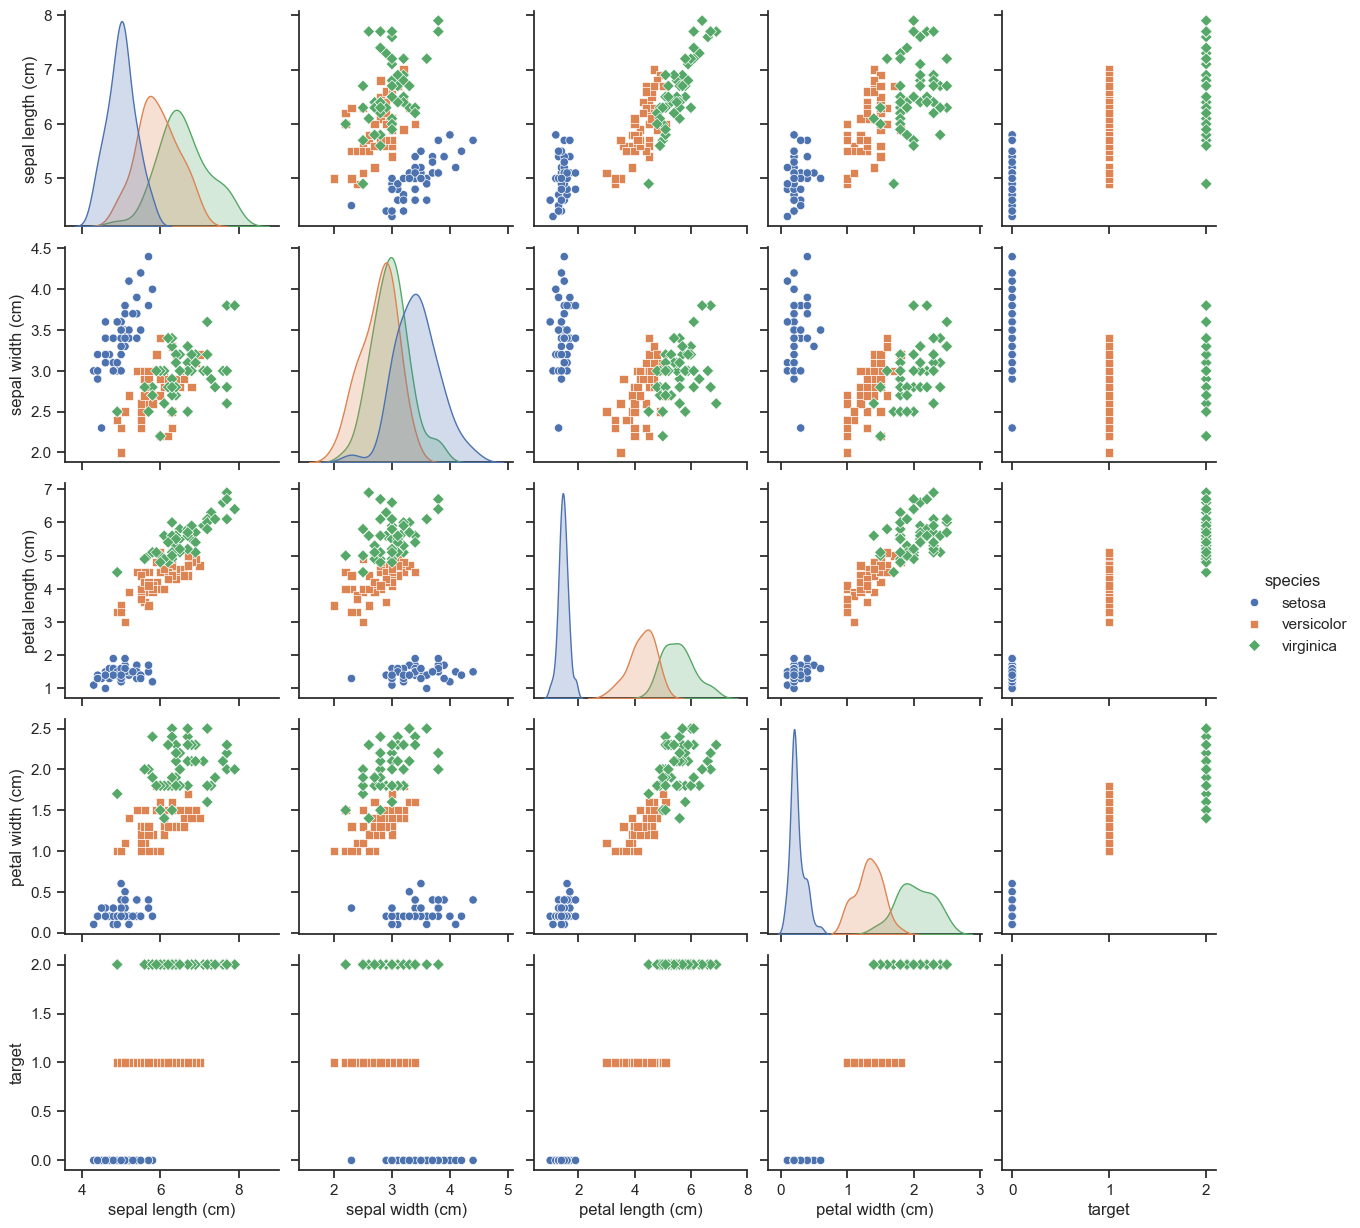

In [6]:
# Pairplot for pairwise relationships
sns.set(style="ticks")
sns.pairplot(data, hue="species", markers=["o", "s", "D"])

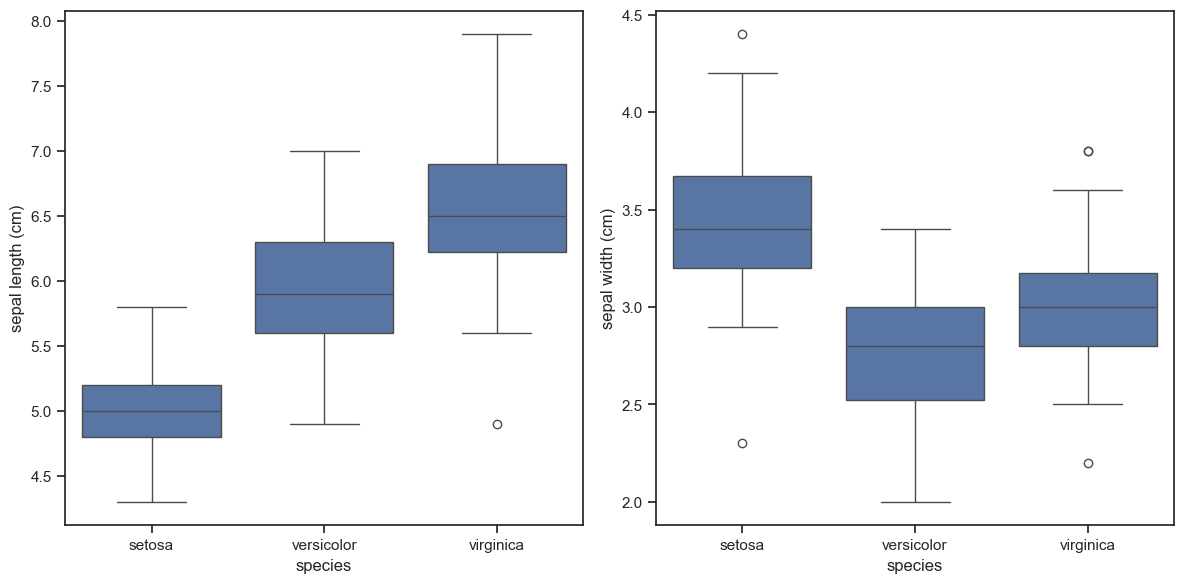

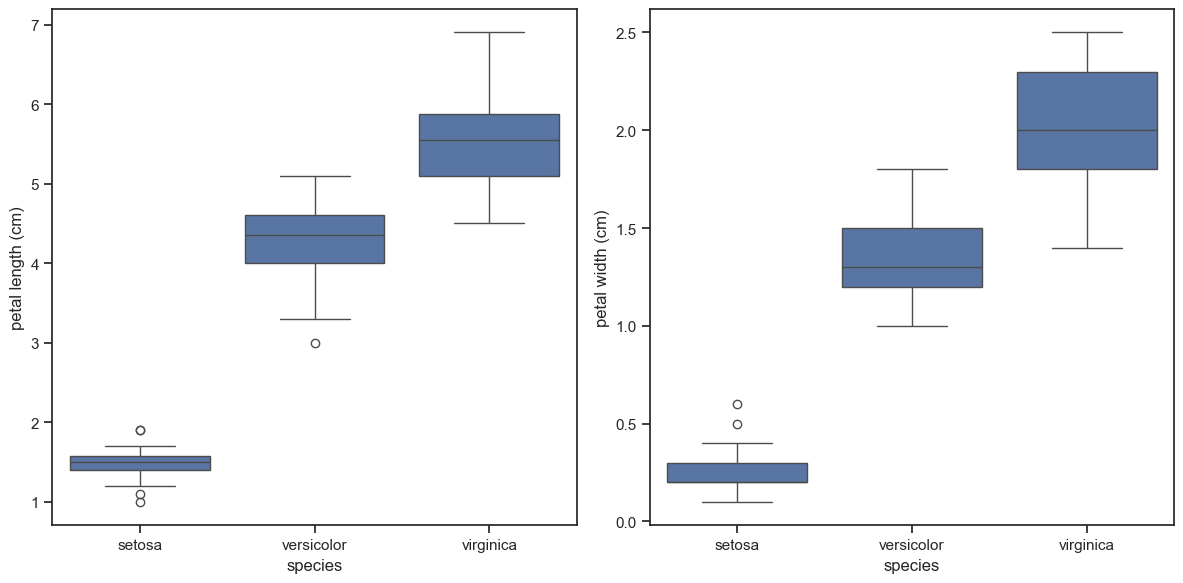

In [7]:
# Boxplots to visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="species", y="sepal length (cm)", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x="species", y="sepal width (cm)", data=data)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="species", y="petal length (cm)", data=data)
plt.subplot(1, 2, 2)
sns.boxplot(x="species", y="petal width (cm)", data=data)
plt.tight_layout()

In [8]:
df2.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
               "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df2['Outcome'] = df2['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Summary statistics
print(df2.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

In [9]:
df2.duplicated().sum()


0

In [10]:
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
(df2[df2.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df2[i].replace({0:df2[i].median()},inplace = True)
(df2[df2.columns] == 0).sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19896\122439778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[i].replace({0:df2[i].median()},inplace = True)


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
for i in ["Glucose", "BMI", "Insulin", "BloodPressure"]:
    df2[i] = df2[i].replace({0: df2[i].median()})
    
# Mengecek ulang jumlah nilai nol di setiap kolom
(df2 == 0).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

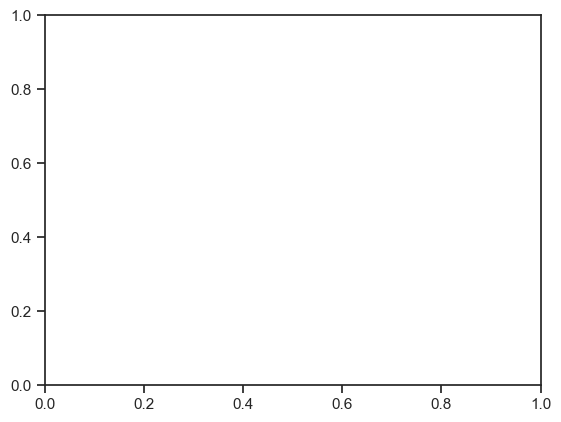

In [14]:
plt.boxplot(df2);

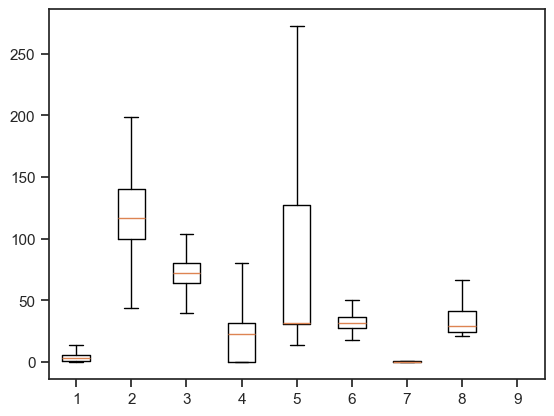

In [ ]:
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(df2[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df2[i]  = np.where(df2[i]>uw,uw,(np.where(df2[i]<lw,lw,df2[i])))
        
outlier_treatment()
plt.boxplot(df2);

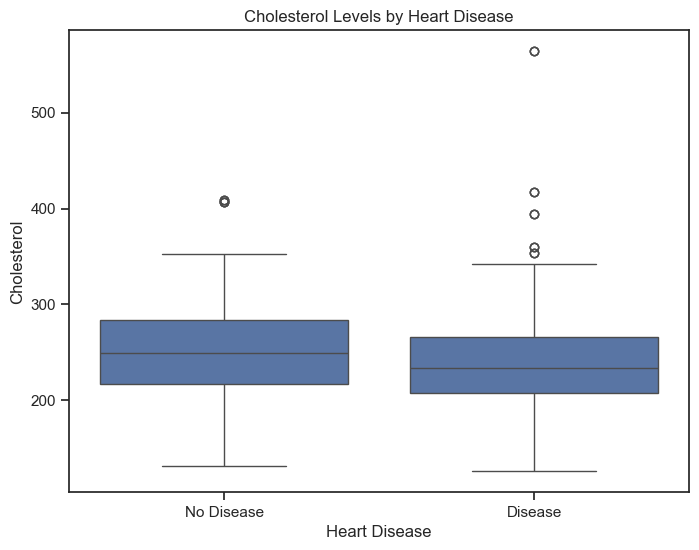

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df1)
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

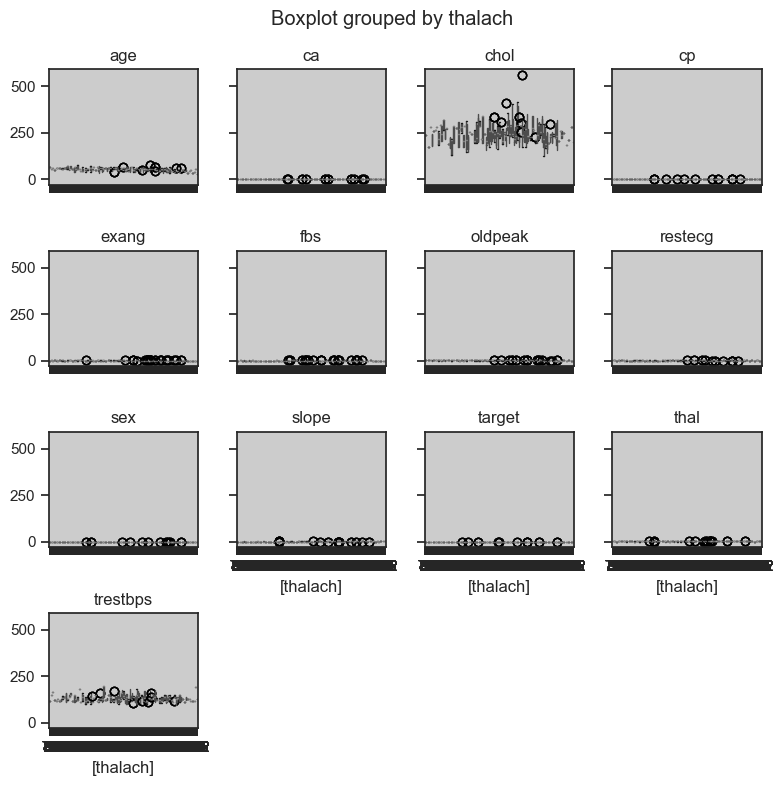

In [ ]:
df1.boxplot(by="thalach", figsize=(8,8))
plt.tight_layout()